In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import preprocessing as preprocess

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
""""Directory
bigcon 
  |- data
       |- 01_제공데이터
       |- 02_평가데이터
"""
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
source_dir = os.path.join(cur_dir, 'source')
data_train_dir = os.path.join(data_dir, '01_제공데이터')
data_test_dir = os.path.join(data_dir, '02_평가데이터')


""" Parameters
"""
headline = '2020 빅콘테스트 데이터분석분야-챔피언리그'
train_target = '2019년 실적데이터'
test_target = '2020년 6월 판매실적예측데이터(평가데이터)'
rate_target = '시청률 데이터'


""" Load Data
"""
dfs = preprocess.ProcessSale(
    data_dir = data_dir,
    source_dir = source_dir,
    data_train_dir = data_train_dir,
    data_test_dir = data_test_dir,
    headline = headline,
    train_target = train_target,
    rate_target = rate_target,
    test_target = test_target,
)

df_train = dfs.train_preprocess()
df_test = dfs.test_preprocess()
df_rate = dfs.rate_preprocess()

Train : file already exist!
Test : file already exist!
train data : 38309
test data : 2891


In [3]:
print(df_train.shape)
print(df_test.shape)

(37372, 25)
(2716, 25)


In [4]:
df_train.columns

Index(['datetime', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'holiday', 'exposure(min)', 'mother_cd', 'product_cd', 'product_name',
       'product_grp', 'temp', 'rainfall', 'wind_speed', 'wind_direction',
       'humidity', 'pressure', 'spot_pressure', 'sea_level_pressure',
       'snowfall', 'unit_price', 'sell_price', 'sales_cnt'],
      dtype='object')

In [5]:
df_train.head()

,datetime,year,month,day,hour,minute,weekday,holiday,exposure(min),mother_cd,product_cd,product_name,product_grp,temp,rainfall,wind_speed,wind_direction,humidity,pressure,spot_pressure,sea_level_pressure,snowfall,unit_price,sell_price,sales_cnt
0,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,2099000.0,52.606516
1,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,NaN,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,4371000.0,109.548872
2,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,3262000.0,81.754386
3,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,NaN,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6955000.0,174.310777
4,2019-01-01 06:40:00,2019,1,1,6,40,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6672000.0,167.218045


## EDA_sales_cnt

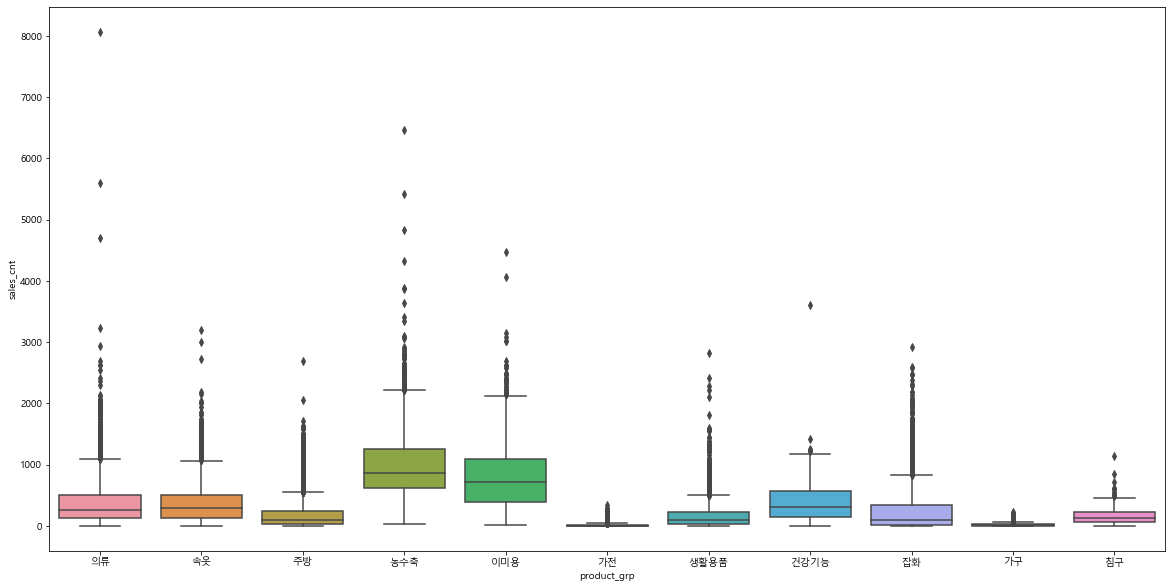

In [106]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train, y='sales_cnt', x='product_grp')
# sns.boxplot(data=df_train, y='sell_price', x='product_grp')

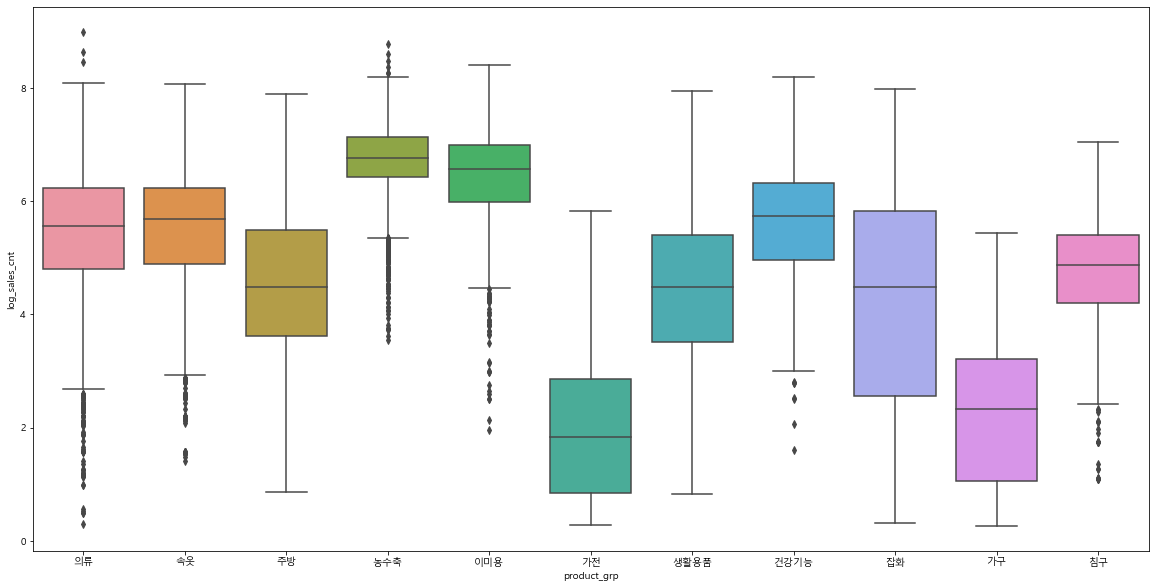

In [108]:
df_train['log_sales_cnt'] = np.log(df_train['sales_cnt'])
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train, y='log_sales_cnt', x='product_grp')

## 0. Correlation

In [109]:
df_train[['temp', 'rainfall', 'wind_speed', 'wind_direction', 'humidity', 'pressure', 
    'spot_pressure', 'sea_level_pressure', 'snowfall', 'sales_cnt', 'log_sales_cnt']].corr()

,temp,rainfall,wind_speed,wind_direction,humidity,pressure,spot_pressure,sea_level_pressure,snowfall,sales_cnt,log_sales_cnt
temp,1.000000,0.053789,0.008451,-0.057546,0.164950,0.826928,-0.784202,-0.802608,-0.088252,0.035368,0.017044
rainfall,0.053789,1.000000,-0.006157,-0.056579,0.238096,0.169565,-0.119882,-0.117899,0.008527,0.013390,0.007864
wind_speed,0.008451,-0.006157,1.000000,0.326258,-0.239707,-0.109322,-0.020971,-0.020621,-0.030645,0.095165,0.090403
wind_direction,-0.057546,-0.056579,0.326258,1.000000,-0.136631,-0.086993,0.095009,0.093895,0.011814,-0.029660,-0.043242
humidity,0.164950,0.238096,-0.239707,-0.136631,1.000000,0.579981,-0.333993,-0.329257,0.082268,-0.070001,-0.061350
pressure,0.826928,0.169565,-0.109322,-0.086993,0.579981,1.000000,-0.736779,-0.748150,-0.048318,0.002081,-0.012107
spot_pressure,-0.784202,-0.119882,-0.020971,0.095009,-0.333993,-0.736779,1.000000,0.999531,0.038891,0.018322,0.036431
sea_level_pressure,-0.802608,-0.117899,-0.020621,0.093895,-0.329257,-0.748150,0.999531,1.000000,0.041798,0.016137,0.034425
snowfall,-0.088252,0.008527,-0.030645,0.011814,0.082268,-0.048318,0.038891,0.041798,1.000000,0.000148,-0.003532
sales_cnt,0.035368,0.013390,0.095165,-0.029660,-0.070001,0.002081,0.018322,0.016137,0.000148,1.000000,0.761066


In [113]:
corr_all = []
for i in list(df_train['product_grp'].unique()):
    corr_list = df_train[df_train['product_grp']==i][['temp', 'rainfall', 'wind_speed', 'wind_direction', 'humidity', 'pressure', 
                         'spot_pressure', 'sea_level_pressure', 'snowfall', 'log_sales_cnt']].corr()['log_sales_cnt'].to_list()
    corr_all.append(corr_list)

In [114]:
df_corr_all = pd.DataFrame(corr_all).T
df_corr_all.columns = list(df_train['product_grp'].unique())
df_corr_all.index = ['temp', 'rainfall', 'wind_speed', 'wind_direction', 'humidity', 'pressure', 
    'spot_pressure', 'sea_level_pressure', 'snowfall', 'log_sales_cnt']

In [144]:
df_corr_all

,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,가구,침구
temp,0.012504,0.177604,0.042517,0.013161,-0.056601,-0.035102,0.009291,0.070204,-0.207719,0.040167,0.288675
rainfall,0.006755,-0.011389,0.012260,0.045088,-0.008142,0.059058,-0.052525,0.050171,0.010837,0.077873,-0.016981
wind_speed,-0.002551,0.016243,0.059302,-0.025415,0.168776,0.030613,0.042127,0.021261,-0.001579,0.026166,0.132780
wind_direction,-0.054281,-0.066496,-0.009309,-0.058913,0.031433,-0.035360,-0.004251,-0.024105,-0.050611,0.040168,-0.037703
humidity,-0.048523,-0.029163,0.024032,0.036210,-0.236037,0.027993,-0.087911,-0.059415,-0.088654,0.082816,-0.245983
pressure,-0.015943,0.110093,0.041335,0.022408,-0.183033,0.004933,-0.054028,0.031591,-0.211444,0.076683,0.019247
spot_pressure,-0.042290,-0.123014,-0.029050,-0.007871,0.099407,0.062713,-0.025881,0.004247,0.152378,-0.040614,-0.213290
sea_level_pressure,-0.041173,-0.126637,-0.030007,-0.008029,0.098279,0.062151,-0.025490,0.000702,0.156858,-0.041030,-0.217835
snowfall,0.031909,-0.060473,0.007828,0.014862,0.001138,-0.023139,0.032642,0.032517,0.056978,0.079675,NaN
log_sales_cnt,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. temp

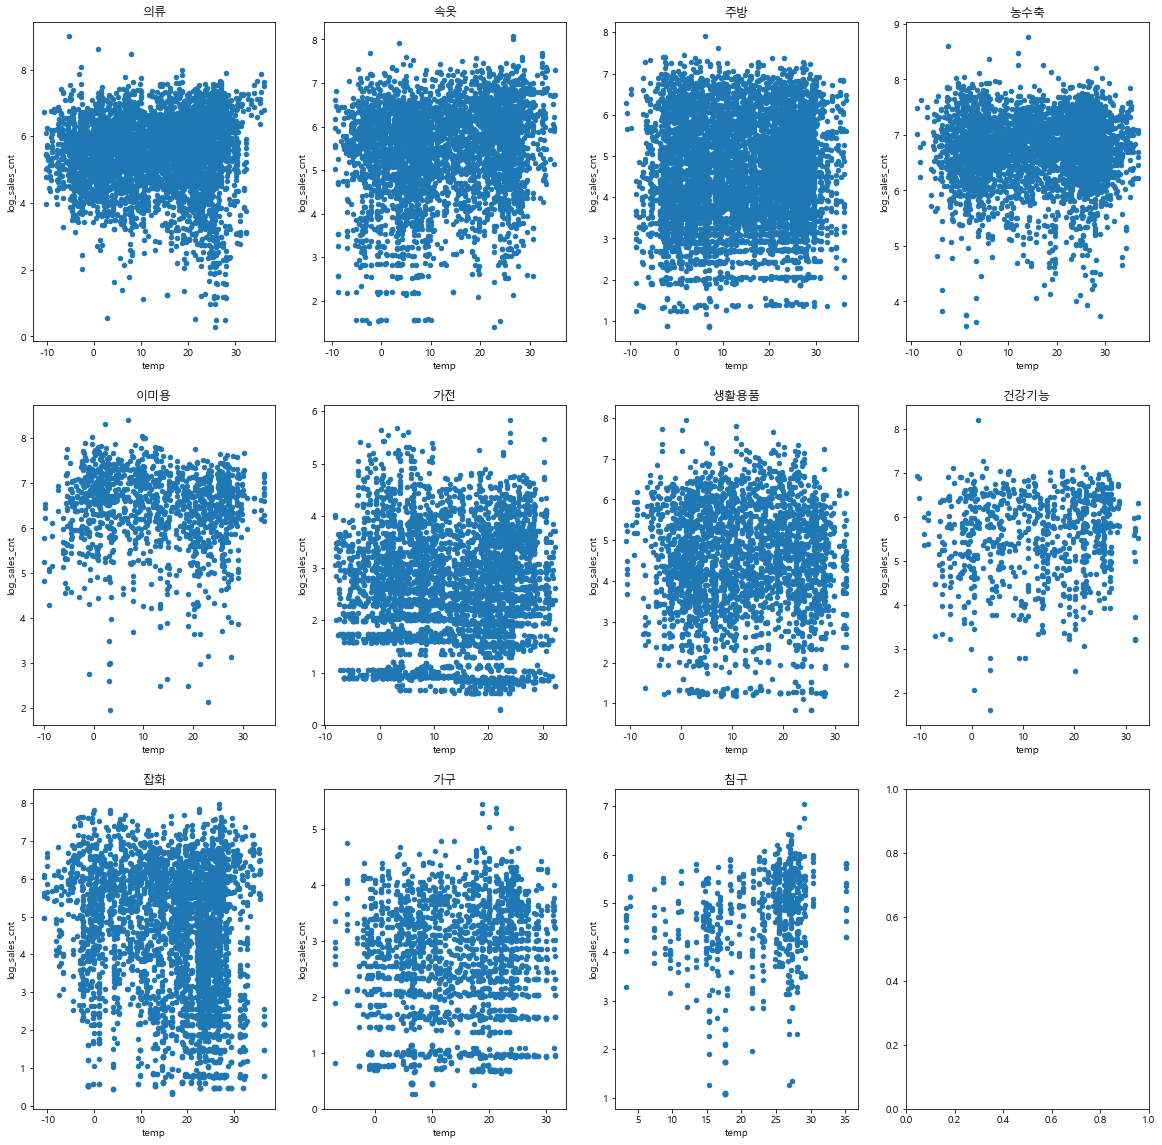

In [116]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='temp', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

## 2. rainfall
binary 변수로 변환하기

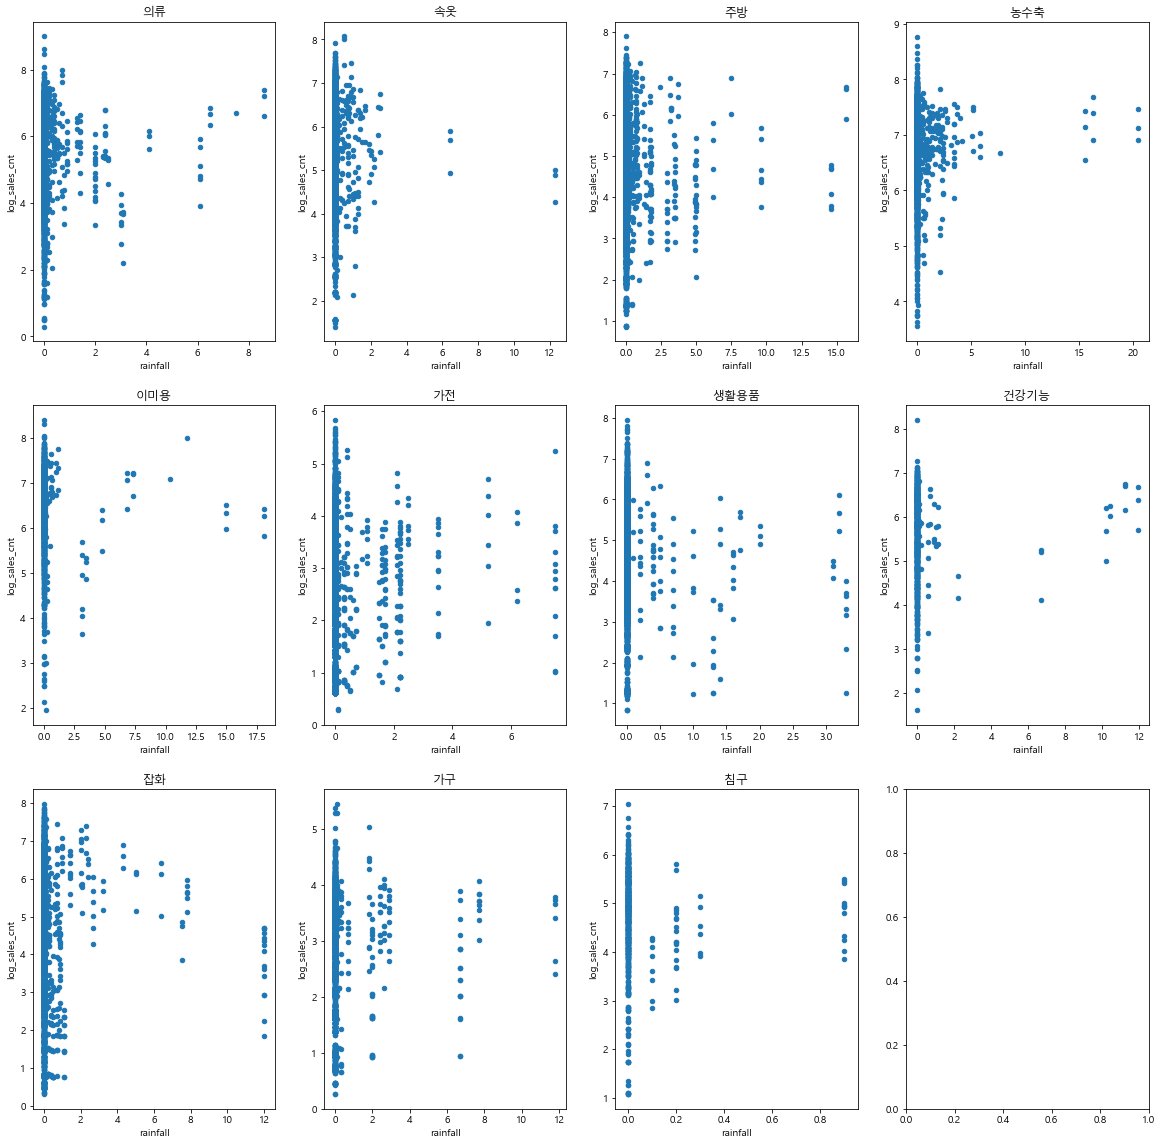

In [123]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='rainfall', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

In [127]:
df_train['rainfall_or_not'] = (df_train['rainfall'] != 0)

In [129]:
df_train.groupby(['rainfall_or_not'])['sales_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
rainfall_or_not,,,,,,,,
False,35279.0,297.241823,420.635404,0.0,19.158654,110.945495,424.820259,8070.401003
True,2093.0,310.950513,448.145269,0.0,18.816521,96.939394,444.060150,3193.545151


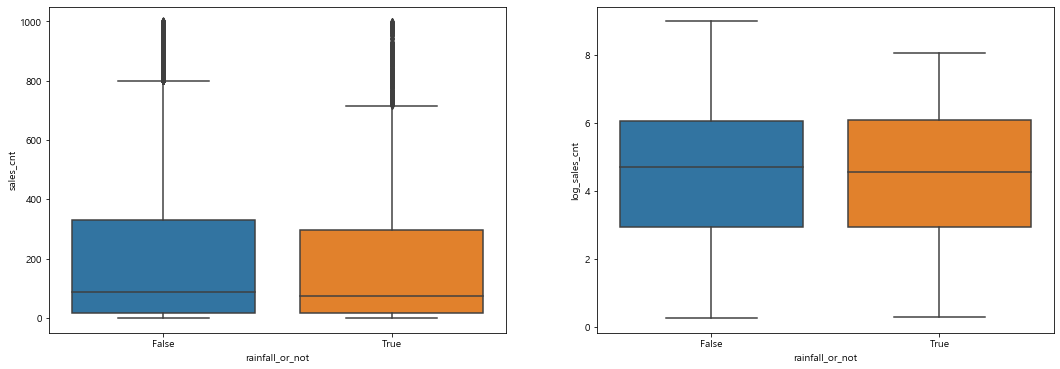

In [139]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18,6)
sns.boxplot(y='sales_cnt', x='rainfall_or_not', data=df_train[df_train['sales_cnt']<1000], ax=axes[0])
sns.boxplot(y='log_sales_cnt', x='rainfall_or_not', data=df_train, ax=axes[1])

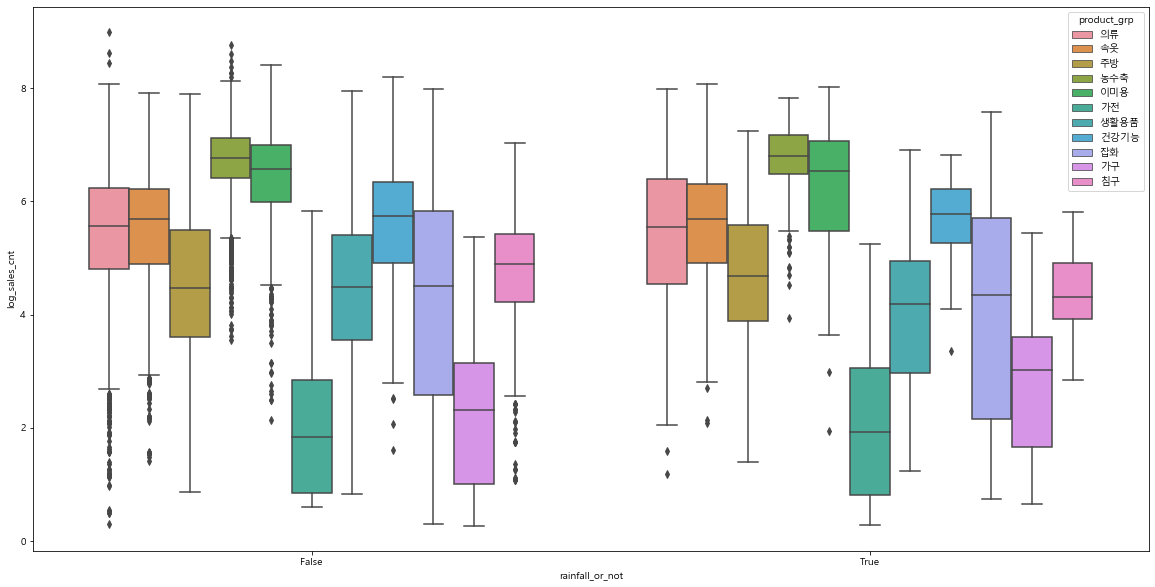

In [142]:
plt.figure(figsize=(20,10))
sns.boxplot(y='log_sales_cnt', x='rainfall_or_not', data=df_train, hue='product_grp')

## 3. wind_speed

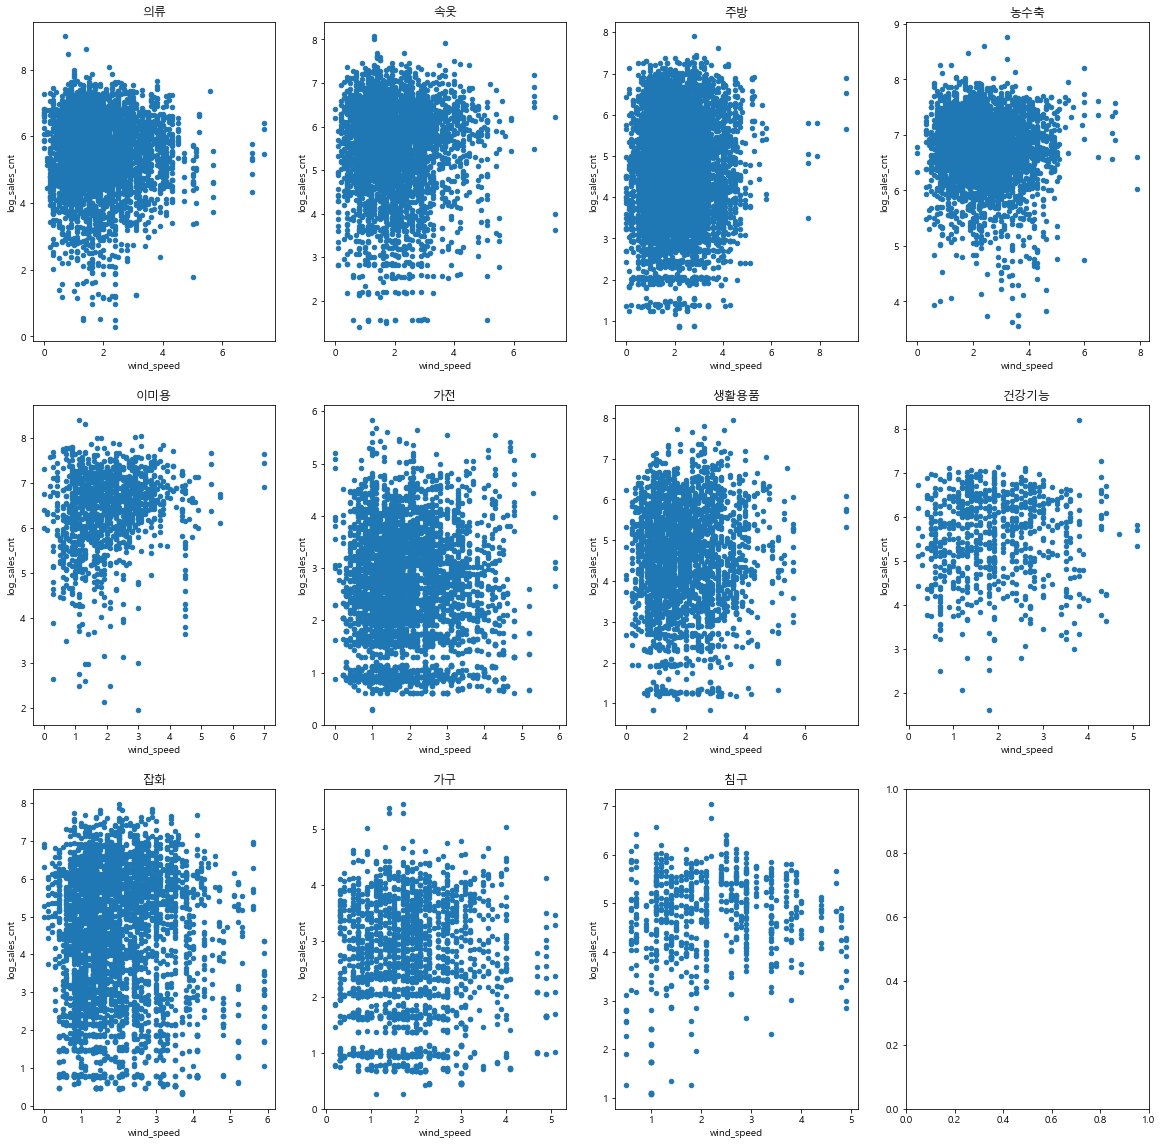

In [137]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='wind_speed', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

## 4. humidity

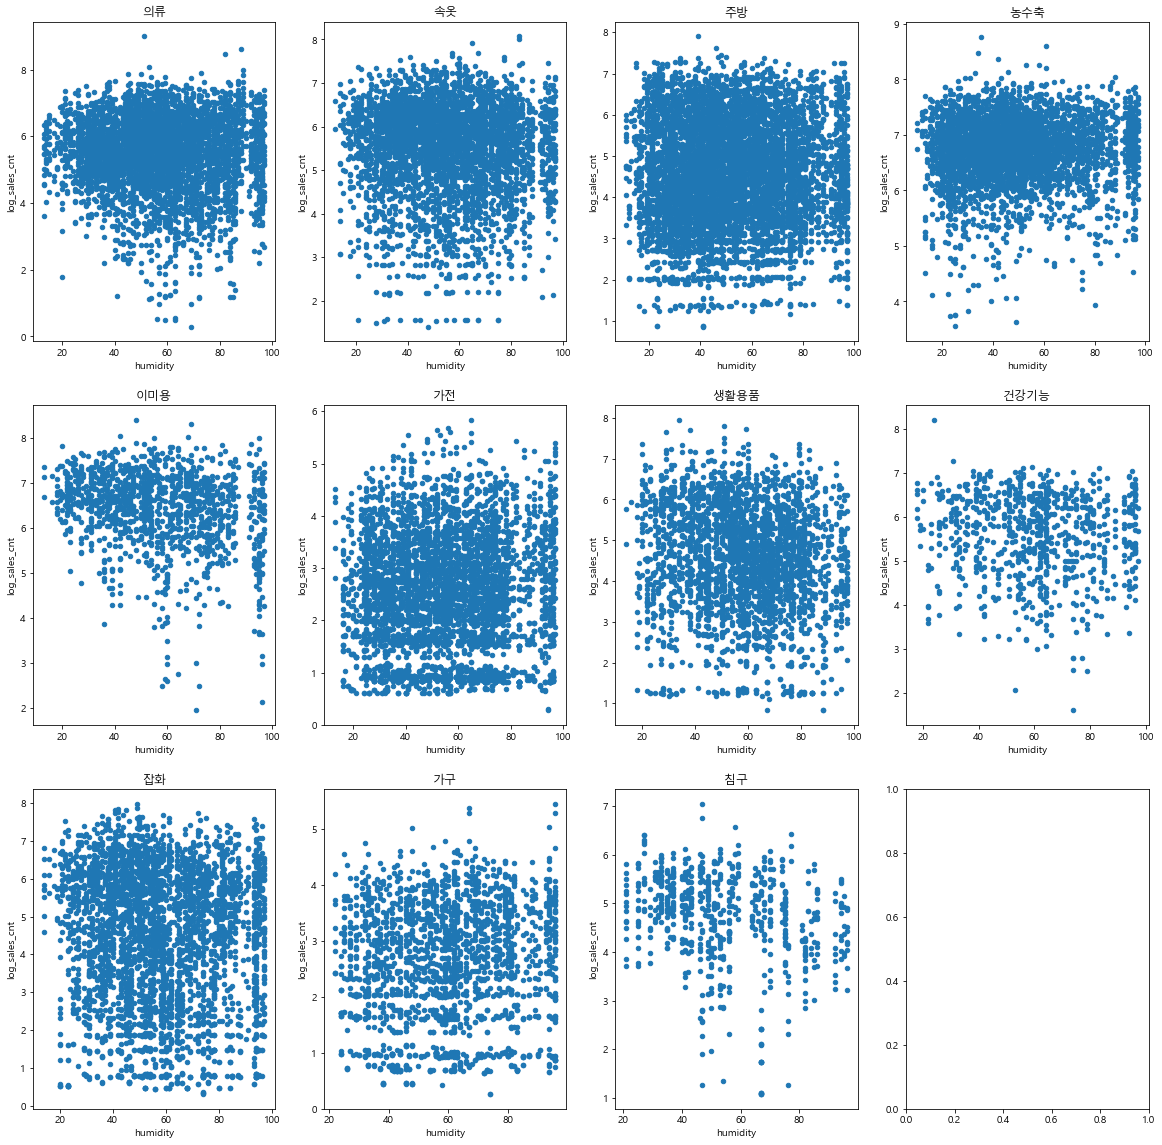

In [147]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='humidity', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

## 5. pressure

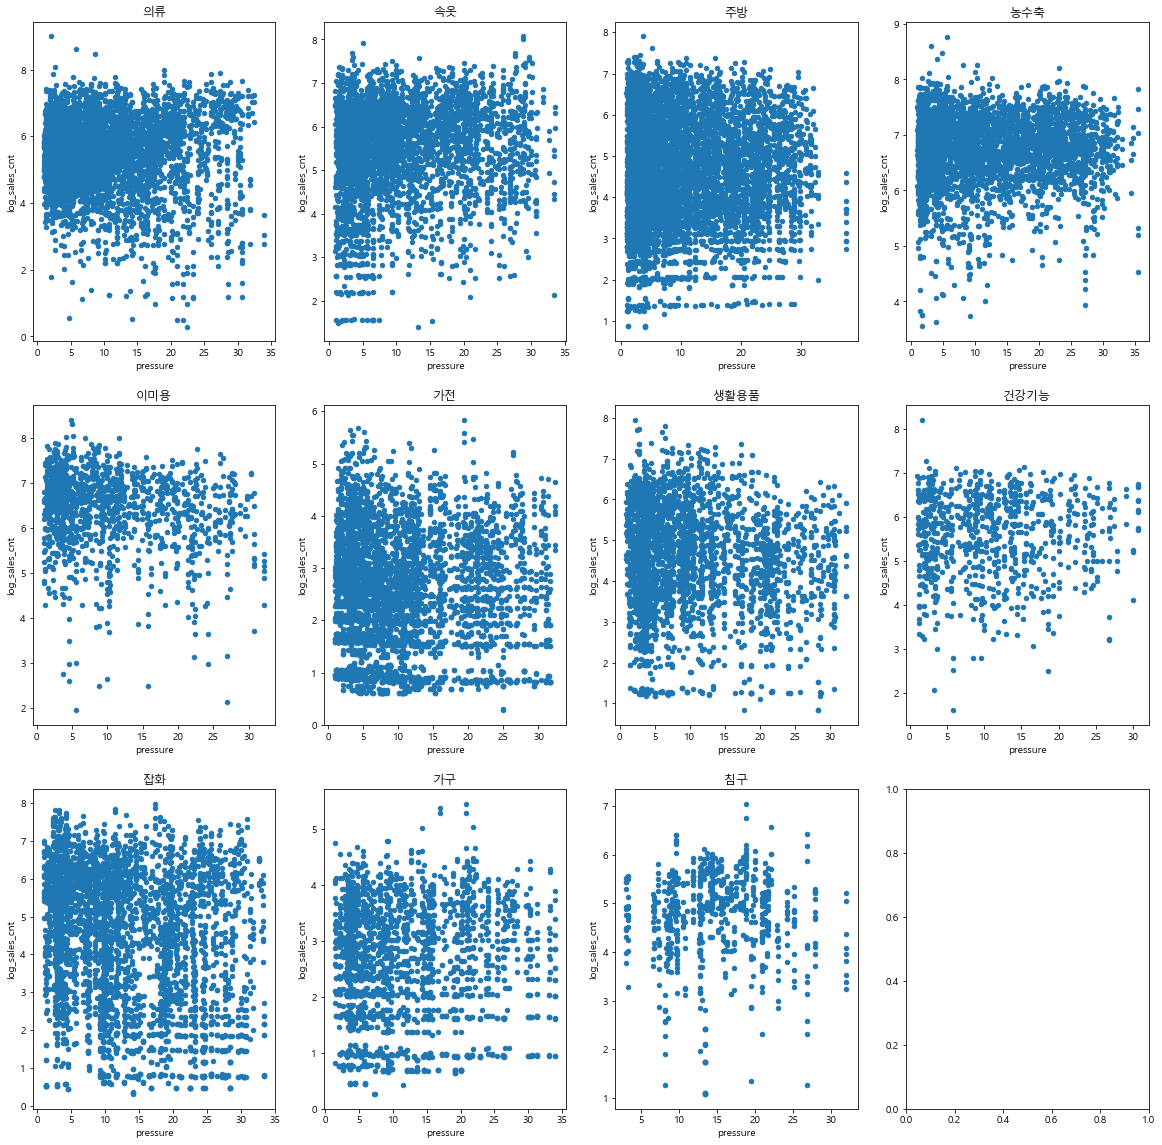

In [148]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='pressure', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

## 6. snowfall

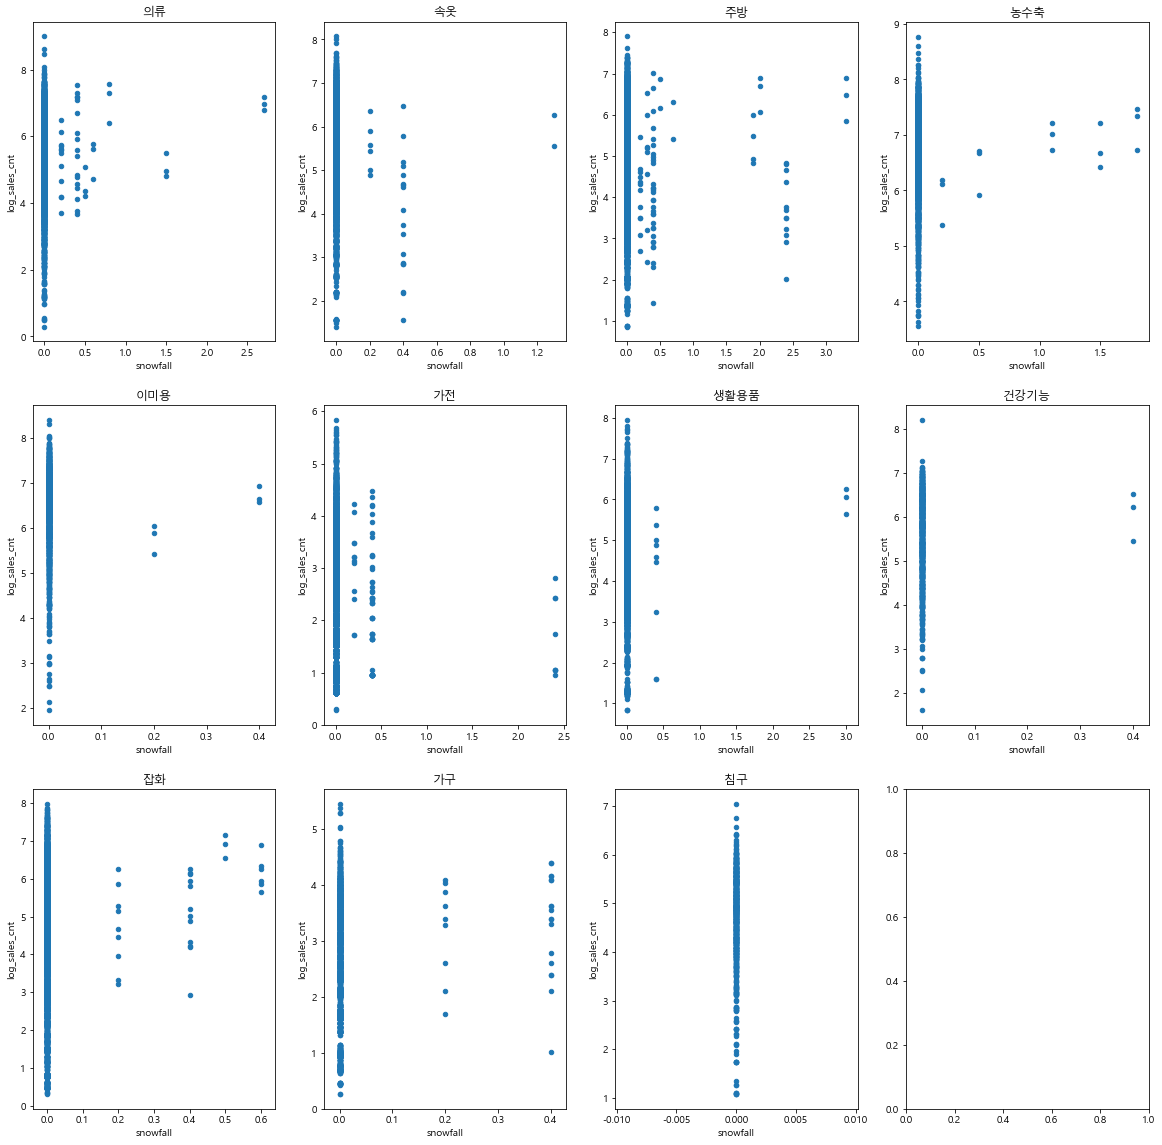

In [149]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(20,20)

for i, grp in enumerate(list(df_train['product_grp'].unique())):
    df_train[df_train['product_grp']==grp].plot(kind='scatter', x='snowfall', y='log_sales_cnt', ax=axes[i//4,i%4], title=grp)

In [150]:
df_train['snowfall_or_not'] = (df_train['snowfall'] != 0)

In [153]:
df_train.groupby(['snowfall_or_not'])['sales_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
snowfall_or_not,,,,,,,,
False,37039.0,298.682395,422.734147,0.0,19.170886,110.813559,426.831781,8070.401003
True,333.0,223.172583,354.288292,0.0,13.501825,64.844595,268.440678,1946.342857


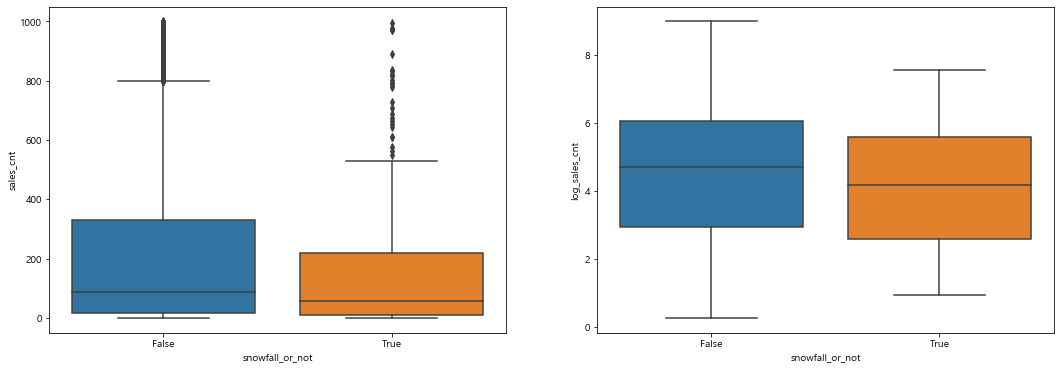

In [152]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18,6)
sns.boxplot(y='sales_cnt', x='snowfall_or_not', data=df_train[df_train['sales_cnt']<1000], ax=axes[0])
sns.boxplot(y='log_sales_cnt', x='snowfall_or_not', data=df_train, ax=axes[1])